# Classifying Handwritten Digits with TF.Learn - Machine Learning Recipes #7
Source: https://www.youtube.com/watch?v=Gj0iyo265bc&index=7&list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal

## Initialize

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn

# reduce logging output from tensorflow
tf.logging.set_verbosity(tf.logging.ERROR)

## Import the dataset

In [2]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


## Display some digits

In [3]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label:%d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

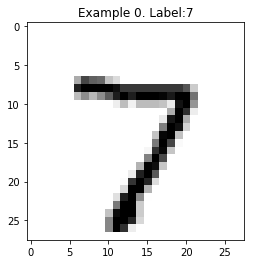

In [4]:
display(0)

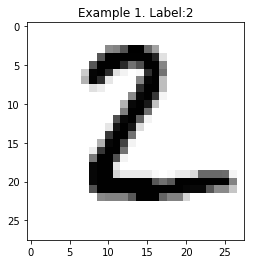

In [5]:
display(1)

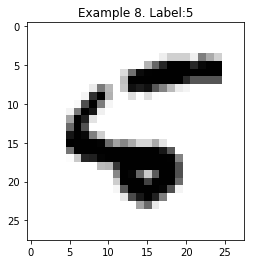

In [6]:
display(8)

In [23]:
print (len(data[0]))
print (len(test_data[0]))

784
784


## Fit a Linear Classifier

In [56]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(n_classes=10, feature_columns=feature_columns, model_dir='ngist_model')
classifier.fit(data, labels, batch_size=100, steps=1000)

C:\Users\Manuel\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:254: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x00000167831E5D68>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

## Evaluate accuracy

In [57]:
classifier.evaluate(test_data, test_labels)
print(classifier.evaluate(test_data, test_labels)['accuracy'])

C:\Users\Manuel\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:254: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


0.9245


## Classify a few examples
We can make predictions on individual images using the predict method

In [86]:
# here's one it gets right
prediction = classifier.predict(test_data)
for i, pred in enumerate(prediction):
    right = True if pred == test_labels[i] else False
    print(str(i) + ': Predicted: ' + str(pred) + ', Label: ' + str(test_labels[i]) + ', Predicted?: ' + str(right))

C:\Users\Manuel\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:254: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


0: Predicted: 7, Label: 7, Predicted?: True
1: Predicted: 2, Label: 2, Predicted?: True
2: Predicted: 1, Label: 1, Predicted?: True
3: Predicted: 0, Label: 0, Predicted?: True
4: Predicted: 4, Label: 4, Predicted?: True
5: Predicted: 1, Label: 1, Predicted?: True
6: Predicted: 4, Label: 4, Predicted?: True
7: Predicted: 9, Label: 9, Predicted?: True
8: Predicted: 6, Label: 5, Predicted?: False
9: Predicted: 9, Label: 9, Predicted?: True
10: Predicted: 0, Label: 0, Predicted?: True
11: Predicted: 6, Label: 6, Predicted?: True
12: Predicted: 9, Label: 9, Predicted?: True
13: Predicted: 0, Label: 0, Predicted?: True
14: Predicted: 1, Label: 1, Predicted?: True
15: Predicted: 5, Label: 5, Predicted?: True
16: Predicted: 9, Label: 9, Predicted?: True
17: Predicted: 7, Label: 7, Predicted?: True
18: Predicted: 3, Label: 3, Predicted?: True
19: Predicted: 4, Label: 4, Predicted?: True
20: Predicted: 9, Label: 9, Predicted?: True
21: Predicted: 6, Label: 6, Predicted?: True
22: Predicted: 6, L

967: Predicted: 1, Label: 1, Predicted?: True
968: Predicted: 4, Label: 4, Predicted?: True
969: Predicted: 4, Label: 4, Predicted?: True
970: Predicted: 5, Label: 5, Predicted?: True
971: Predicted: 4, Label: 4, Predicted?: True
972: Predicted: 0, Label: 0, Predicted?: True
973: Predicted: 6, Label: 6, Predicted?: True
974: Predicted: 2, Label: 2, Predicted?: True
975: Predicted: 3, Label: 2, Predicted?: False
976: Predicted: 3, Label: 3, Predicted?: True
977: Predicted: 1, Label: 1, Predicted?: True
978: Predicted: 5, Label: 5, Predicted?: True
979: Predicted: 1, Label: 1, Predicted?: True
980: Predicted: 2, Label: 2, Predicted?: True
981: Predicted: 0, Label: 0, Predicted?: True
982: Predicted: 8, Label: 3, Predicted?: False
983: Predicted: 8, Label: 8, Predicted?: True
984: Predicted: 1, Label: 1, Predicted?: True
985: Predicted: 2, Label: 2, Predicted?: True
986: Predicted: 6, Label: 6, Predicted?: True
987: Predicted: 7, Label: 7, Predicted?: True
988: Predicted: 1, Label: 1, Pre

2726: Predicted: 2, Label: 2, Predicted?: True
2727: Predicted: 5, Label: 5, Predicted?: True
2728: Predicted: 6, Label: 6, Predicted?: True
2729: Predicted: 2, Label: 2, Predicted?: True
2730: Predicted: 4, Label: 7, Predicted?: False
2731: Predicted: 3, Label: 3, Predicted?: True
2732: Predicted: 6, Label: 6, Predicted?: True
2733: Predicted: 0, Label: 0, Predicted?: True
2734: Predicted: 1, Label: 1, Predicted?: True
2735: Predicted: 9, Label: 9, Predicted?: True
2736: Predicted: 7, Label: 7, Predicted?: True
2737: Predicted: 6, Label: 6, Predicted?: True
2738: Predicted: 6, Label: 6, Predicted?: True
2739: Predicted: 8, Label: 8, Predicted?: True
2740: Predicted: 9, Label: 9, Predicted?: True
2741: Predicted: 2, Label: 2, Predicted?: True
2742: Predicted: 9, Label: 9, Predicted?: True
2743: Predicted: 5, Label: 5, Predicted?: True
2744: Predicted: 8, Label: 8, Predicted?: True
2745: Predicted: 3, Label: 3, Predicted?: True
2746: Predicted: 1, Label: 1, Predicted?: True
2747: Predic

4697: Predicted: 7, Label: 7, Predicted?: True
4698: Predicted: 6, Label: 6, Predicted?: True
4699: Predicted: 6, Label: 6, Predicted?: True
4700: Predicted: 9, Label: 9, Predicted?: True
4701: Predicted: 9, Label: 9, Predicted?: True
4702: Predicted: 6, Label: 6, Predicted?: True
4703: Predicted: 3, Label: 3, Predicted?: True
4704: Predicted: 6, Label: 6, Predicted?: True
4705: Predicted: 2, Label: 2, Predicted?: True
4706: Predicted: 9, Label: 9, Predicted?: True
4707: Predicted: 8, Label: 8, Predicted?: True
4708: Predicted: 1, Label: 1, Predicted?: True
4709: Predicted: 2, Label: 2, Predicted?: True
4710: Predicted: 2, Label: 2, Predicted?: True
4711: Predicted: 5, Label: 5, Predicted?: True
4712: Predicted: 5, Label: 5, Predicted?: True
4713: Predicted: 2, Label: 2, Predicted?: True
4714: Predicted: 3, Label: 3, Predicted?: True
4715: Predicted: 7, Label: 7, Predicted?: True
4716: Predicted: 2, Label: 2, Predicted?: True
4717: Predicted: 1, Label: 1, Predicted?: True
4718: Predict

6221: Predicted: 9, Label: 9, Predicted?: True
6222: Predicted: 1, Label: 1, Predicted?: True
6223: Predicted: 7, Label: 7, Predicted?: True
6224: Predicted: 1, Label: 1, Predicted?: True
6225: Predicted: 2, Label: 2, Predicted?: True
6226: Predicted: 3, Label: 3, Predicted?: True
6227: Predicted: 3, Label: 5, Predicted?: False
6228: Predicted: 9, Label: 9, Predicted?: True
6229: Predicted: 6, Label: 6, Predicted?: True
6230: Predicted: 9, Label: 9, Predicted?: True
6231: Predicted: 1, Label: 1, Predicted?: True
6232: Predicted: 1, Label: 1, Predicted?: True
6233: Predicted: 1, Label: 1, Predicted?: True
6234: Predicted: 2, Label: 2, Predicted?: True
6235: Predicted: 9, Label: 9, Predicted?: True
6236: Predicted: 5, Label: 5, Predicted?: True
6237: Predicted: 6, Label: 6, Predicted?: True
6238: Predicted: 8, Label: 8, Predicted?: True
6239: Predicted: 1, Label: 1, Predicted?: True
6240: Predicted: 2, Label: 2, Predicted?: True
6241: Predicted: 0, Label: 0, Predicted?: True
6242: Predic

7927: Predicted: 7, Label: 7, Predicted?: True
7928: Predicted: 8, Label: 1, Predicted?: False
7929: Predicted: 6, Label: 6, Predicted?: True
7930: Predicted: 2, Label: 2, Predicted?: True
7931: Predicted: 9, Label: 9, Predicted?: True
7932: Predicted: 3, Label: 3, Predicted?: True
7933: Predicted: 0, Label: 0, Predicted?: True
7934: Predicted: 1, Label: 1, Predicted?: True
7935: Predicted: 2, Label: 2, Predicted?: True
7936: Predicted: 3, Label: 3, Predicted?: True
7937: Predicted: 4, Label: 4, Predicted?: True
7938: Predicted: 5, Label: 5, Predicted?: True
7939: Predicted: 6, Label: 6, Predicted?: True
7940: Predicted: 7, Label: 7, Predicted?: True
7941: Predicted: 8, Label: 8, Predicted?: True
7942: Predicted: 9, Label: 9, Predicted?: True
7943: Predicted: 0, Label: 0, Predicted?: True
7944: Predicted: 1, Label: 1, Predicted?: True
7945: Predicted: 6, Label: 2, Predicted?: False
7946: Predicted: 3, Label: 3, Predicted?: True
7947: Predicted: 4, Label: 4, Predicted?: True
7948: Predi

9756: Predicted: 6, Label: 6, Predicted?: True
9757: Predicted: 0, Label: 0, Predicted?: True
9758: Predicted: 3, Label: 3, Predicted?: True
9759: Predicted: 8, Label: 8, Predicted?: True
9760: Predicted: 1, Label: 1, Predicted?: True
9761: Predicted: 0, Label: 0, Predicted?: True
9762: Predicted: 3, Label: 3, Predicted?: True
9763: Predicted: 0, Label: 0, Predicted?: True
9764: Predicted: 8, Label: 4, Predicted?: False
9765: Predicted: 7, Label: 7, Predicted?: True
9766: Predicted: 4, Label: 4, Predicted?: True
9767: Predicted: 9, Label: 9, Predicted?: True
9768: Predicted: 0, Label: 2, Predicted?: False
9769: Predicted: 9, Label: 9, Predicted?: True
9770: Predicted: 0, Label: 5, Predicted?: False
9771: Predicted: 7, Label: 7, Predicted?: True
9772: Predicted: 1, Label: 1, Predicted?: True
9773: Predicted: 7, Label: 7, Predicted?: True
9774: Predicted: 1, Label: 1, Predicted?: True
9775: Predicted: 6, Label: 6, Predicted?: True
9776: Predicted: 6, Label: 6, Predicted?: True
9777: Pred

## Visualize learned weights
Let's see if we can reproduce the pictures of the weights in the TensorFlow Beginner's MNIST tutorial.

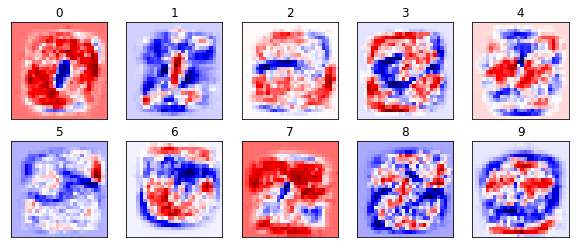

In [104]:
weights = np.asarray([classifier.get_variable_value(a) for a in classifier.get_variable_names() if a.endswith('weight')][0])
f, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)

        
for i in range(len(axes)):
    a = axes[i] 
    # transpose weights with method T to parse [784][10] array to [10][784] array
    img = weights.T[i].reshape(28,28)
    a.imshow(img, cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(()) # ticks be gone
    a.set_yticks(())
plt.show()